In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from convnets.utilities import utils_nets


In [2]:
# dimensions of our images.
img_width, img_height = 224, 224

train_data_dir = '../../data/passport_2class_divided_clean/train'
validation_data_dir = '../../ data/passport_2class_divided_clean/validation'

nb_train_samples = 480
nb_validation_samples = 130
epochs = 100
batch_size = 5

In [3]:
def train_model():
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), input_shape=(224, 224, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='random_normal', bias_initializer='zeros'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten()) 
    model.add(Dense(units = 64, activation = 'relu', kernel_initializer='random_normal', bias_initializer='zeros'))
    model.add(Dropout(0.5)) 
    model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer='random_normal', bias_initializer='zeros'))
    
    # COMPILE
    
    model.compile(loss='binary_crossentropy',
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    
    history = model.fit_generator(
            generator=train_generator,
            steps_per_epoch=nb_train_samples // batch_size,
            epochs=epochs,
            validation_data=val_generator,
            validation_steps=nb_validation_samples // batch_size)
    
    return model, history

In [4]:
train_generator, val_generator = utils_nets.init_generators(train_data_dir,
                                                       validation_data_dir,
                                                       img_width,
                                                       img_height,
                                                       batch_size,
                                                        batch_size)


Found 480 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [5]:
model, history = train_model()





Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
96/96 [==============================] - 12s 121ms/step - loss: 0.7120 - accuracy: 0.5375 - val_loss: 0.6108 - val_accuracy: 0.7000

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


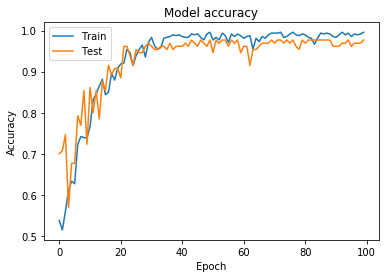

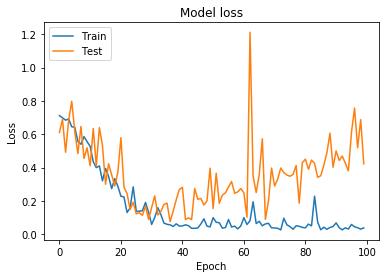

In [6]:
utils_nets.plot(history)

In [7]:
model.save("../../data/weights/simple/conv3_passport.h5")

